In [8]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy

In [2]:
df = pd.read_csv('/content/EPL_Soccer_MLR_LR.csv')

In [3]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [6]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [9]:
corr = df.corr()
corr

<ipython-input-9-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


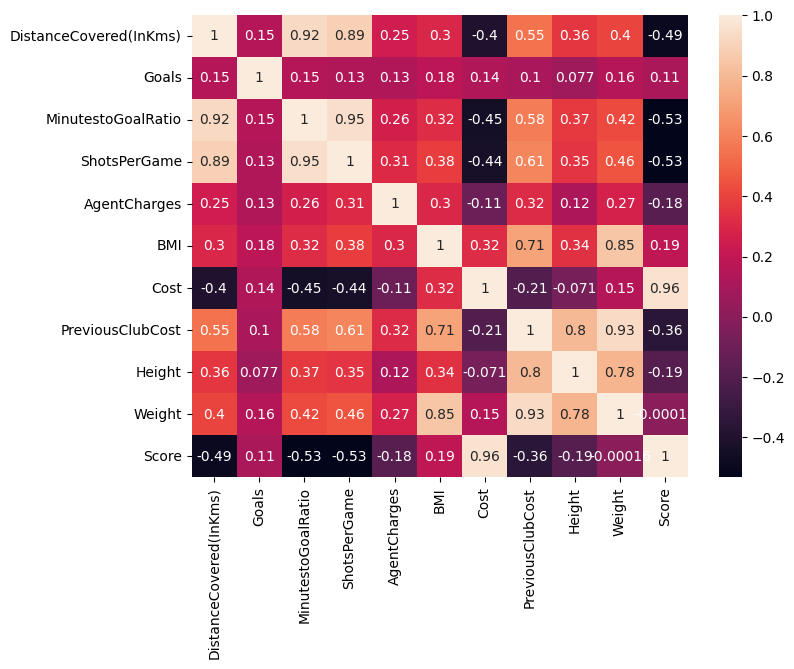

In [30]:
plt.figure(figsize=(8,6))
ax=sns.heatmap(corr,annot=True)
plt.xticks(rotation=90)
plt.show()

In [31]:
# Extract predictor variables (remove categorical variables like team)
X = df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y = df['Score']

In [32]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80,
                                                    test_size = 0.20, random_state = 100)

In [33]:
# Fit the linear regression model
x_train_with_intercept = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_intercept).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     502.6
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          3.85e-102
Time:                        05:44:56   Log-Likelihood:                -270.91
No. Observations:                 161   AIC:                             557.8
Df Residuals:                     153   BIC:                             582.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [34]:
#Can we trim some variables and see how it performs?
X=df[['DistanceCovered(InKms)'
        , 'BMI', 'Cost',
       'PreviousClubCost']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80,
                                                    test_size = 0.20, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     885.8
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          4.26e-106
Time:                        05:46:27   Log-Likelihood:                -271.87
No. Observations:                 161   AIC:                             553.7
Df Residuals:                     156   BIC:                             569.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

## **throwing in club data using dummy variables**

In [36]:
clubs=set(df.Club)
clubs

{'CHE', 'LIV', 'MUN'}

In [38]:
nominal_feature = pd.get_dummies(df['Club'])
nominal_feature.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


[Text(0, 0, '202'), Text(0, 0, '202'), Text(0, 0, '202')]

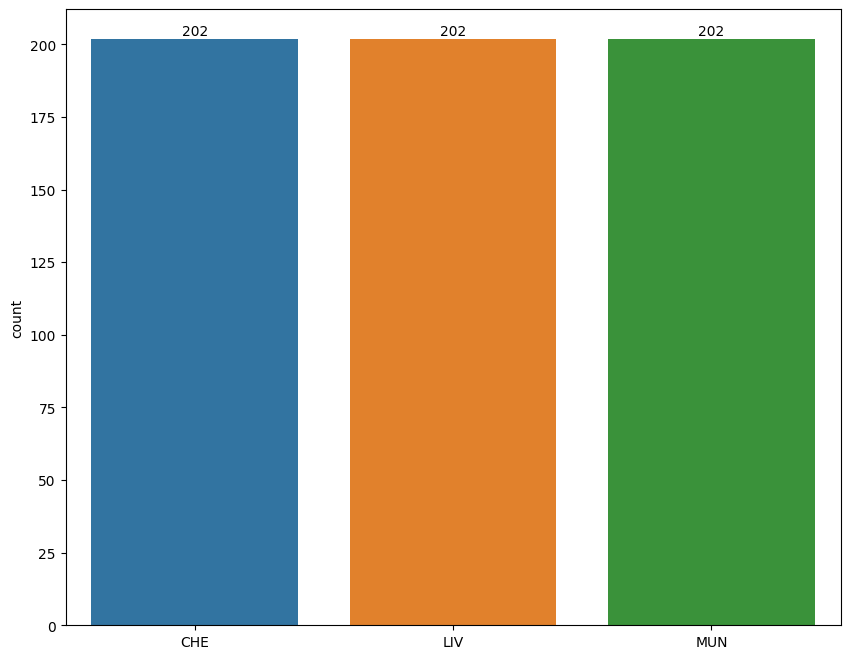

In [47]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=nominal_feature)
ax.bar_label(ax.containers[0])


In [48]:
df_encode = pd.concat([df,nominal_feature],axis=1)
df_encode.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [51]:
#try with df_encode data
X=df_encode[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost','CHE','MUN','LIV']]

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.80,
                                                 test_size=0.20)
x_train_with_intercept=sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_with_intercept).fit()


In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     800.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          2.33e-113
Time:                        06:05:39   Log-Likelihood:                -230.47
No. Observations:                 161   AIC:                             474.9
Df Residuals:                     154   BIC:                             496.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

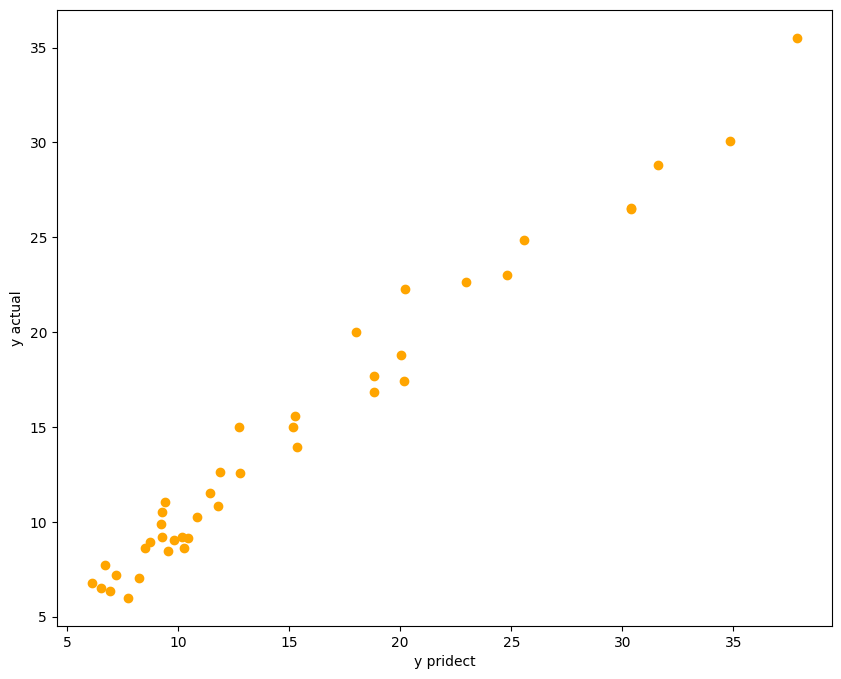

In [57]:
#plot the scatter plot with above data

plt.figure(figsize=(10,8))
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = model.predict(x_test_with_intercept)
plt.scatter(y_test_fitted,y_test,color='orange')
plt.xlabel('y pridect')
plt.ylabel('y actual')
plt.show()